## Methods of Prediction M507
### Final Assignment
### Adolfo Mier y Teran Ruschke - GH1020379

### Problem Statement

I am an experienced Data Scientist hired by a Wholesale company to understand their customers better. I was given a dataset containing some description about their purchases ammounts and we intend to create a clustering model to segment them. This for the company to create marketing strategies for each category of their customers.

We will find the optimal number of clusters using two different metrics (Inertia and Silhouette Score) and we will present our results to the company.

We are using a public dataset obtained from Kaggle under the following url:
https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set

No copyright infringement intended

### Import libraries

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from IPython import display

### Import dataset

In [25]:
customers_db = pd.read_csv('/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/methods_of_prediction/wholesale_customers_data.csv')
customers_db.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Data exploration

In [26]:
customers_db.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [27]:
customers_db.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

### Define number of clusters

We will use the K-Means algorithm and to minimize the inertia when selecting the number of clusters we will use the elbow method.

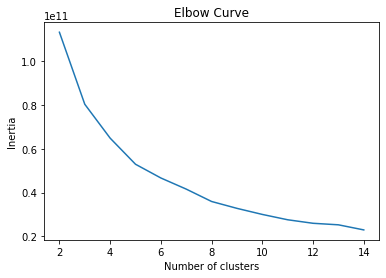

In [28]:
#Define range of clusters to measure
clus_range = range(2,15)

#Intertia list
inertia = []

#Loop over the range of clusters
for k in clus_range:
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(customers_db)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(clus_range, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

We will also evaluate the Silhouette Score in order to maximize it according to the optimal number of clusters

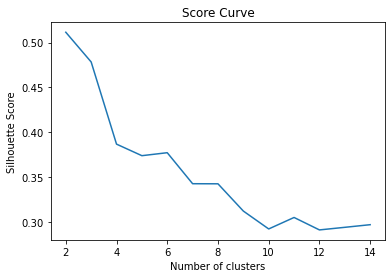

In [29]:
#Define range of clusters to measure
clus_range = range(2,15)

#Silhouette score list
silhouette = []

#Loop over the range of clusters
for s in clus_range:
    kmeans = KMeans(n_clusters=s, n_init=20)
    kmeans.fit(customers_db)
    silhouette.append(silhouette_score(customers_db, kmeans.labels_))

# Plot the elbow curve
plt.plot(clus_range, silhouette)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Score Curve')
plt.show()

### We fit the model using 5 clusters according to the optimal number obtained by the elbow method and the silhouette score

In [30]:
k_model = KMeans(n_clusters=5, init='k-means++', n_init=20)
k_model.fit(customers_db)

KMeans(n_clusters=5, n_init=20)

### Add the column with the new labels to the original dataset

In [31]:
customers_db['Cluster_Label'] = k_model.labels_
customers_db.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_Label
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,3


In [32]:
customers_db['Cluster_Label'].value_counts()

1    224
3    104
0     81
2     24
4      7
Name: Cluster_Label, dtype: int64

### Data analysis for each of the clusters

We will represent each of the clusters with some charts to gain an initial insight on how are they distributed according to their features

In [33]:
#Create individual datasets for each of the clusters to analyze them
cluster_0 = customers_db[customers_db['Cluster_Label'] == 0]
cluster_1 = customers_db[customers_db['Cluster_Label'] == 1]
cluster_2 = customers_db[customers_db['Cluster_Label'] == 2]
cluster_3 = customers_db[customers_db['Cluster_Label'] == 3]
cluster_4 = customers_db[customers_db['Cluster_Label'] == 4]

##### Cluster 0

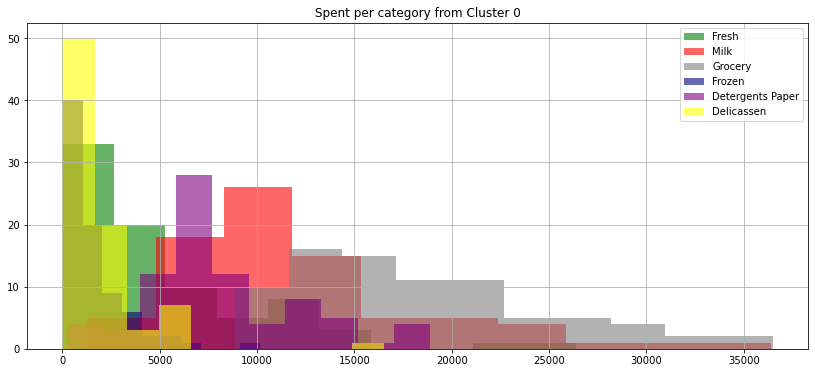

In [34]:
cluster_0['Fresh'].hist(bins=10, alpha = 0.6, color='green', figsize=(14,6), grid=True)
cluster_0['Milk'].hist(bins=10, alpha = 0.6, color='red', figsize=(14,6), grid=True)
cluster_0['Grocery'].hist(bins=10, alpha = 0.6, color='gray', figsize=(14,6), grid=True)
cluster_0['Frozen'].hist(bins=10, alpha = 0.6, color='navy', figsize=(14,6), grid=True)
cluster_0['Detergents_Paper'].hist(bins=10, alpha = 0.6, color='purple', figsize=(14,6), grid=True)
cluster_0['Delicassen'].hist(bins=10, alpha = 0.6, color='yellow', figsize=(14,6), grid=True)
plt.legend(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents Paper', 'Delicassen'])
plt.title('Spent per category from Cluster 0')
plt.show()

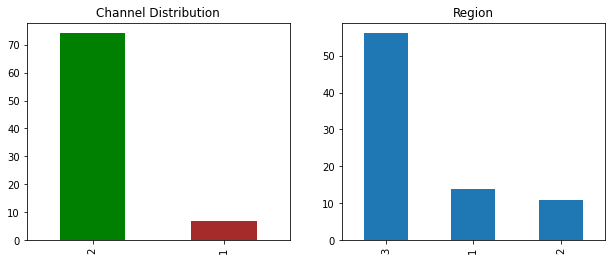

In [35]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
cluster_0['Channel'].value_counts().plot(kind='bar', color=['green', 'brown'])
plt.title('Channel Distribution')
plt.subplot(132)
cluster_0['Region'].value_counts().plot(kind='bar')
plt.title('Region')
plt.show()

##### Cluster 1

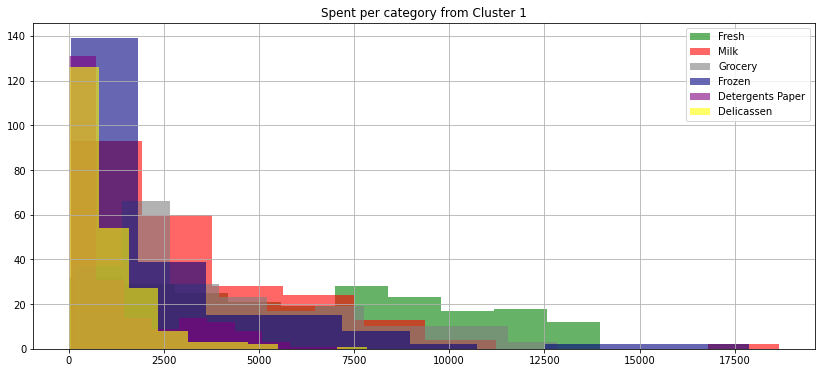

In [36]:
cluster_1['Fresh'].hist(bins=10, alpha = 0.6, color='green', figsize=(14,6), grid=True)
cluster_1['Milk'].hist(bins=10, alpha = 0.6, color='red', figsize=(14,6), grid=True)
cluster_1['Grocery'].hist(bins=10, alpha = 0.6, color='gray', figsize=(14,6), grid=True)
cluster_1['Frozen'].hist(bins=10, alpha = 0.6, color='navy', figsize=(14,6), grid=True)
cluster_1['Detergents_Paper'].hist(bins=10, alpha = 0.6, color='purple', figsize=(14,6), grid=True)
cluster_1['Delicassen'].hist(bins=10, alpha = 0.6, color='yellow', figsize=(14,6), grid=True)
plt.legend(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents Paper', 'Delicassen'])
plt.title('Spent per category from Cluster 1')
plt.show()

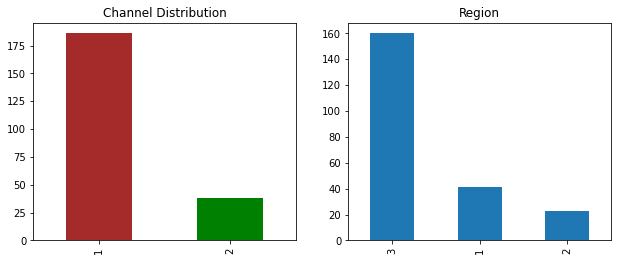

In [37]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
cluster_1['Channel'].value_counts().plot(kind='bar', color=['brown', 'green'])
plt.title('Channel Distribution')
plt.subplot(132)
cluster_1['Region'].value_counts().plot(kind='bar')
plt.title('Region')
plt.show()

##### Cluster 2

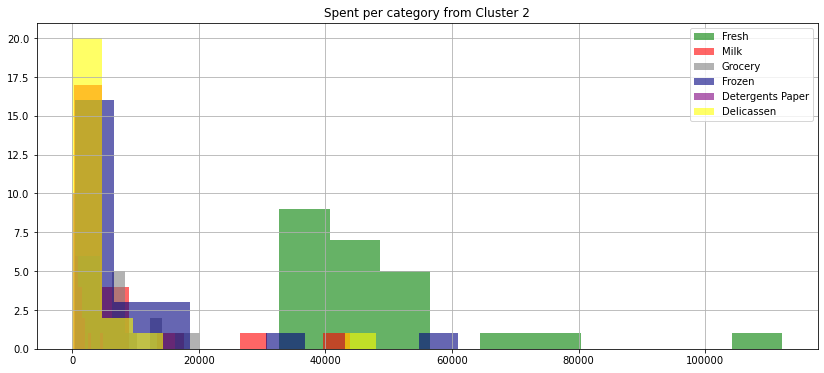

In [38]:
cluster_2['Fresh'].hist(bins=10, alpha = 0.6, color='green', figsize=(14,6), grid=True)
cluster_2['Milk'].hist(bins=10, alpha = 0.6, color='red', figsize=(14,6), grid=True)
cluster_2['Grocery'].hist(bins=10, alpha = 0.6, color='gray', figsize=(14,6), grid=True)
cluster_2['Frozen'].hist(bins=10, alpha = 0.6, color='navy', figsize=(14,6), grid=True)
cluster_2['Detergents_Paper'].hist(bins=10, alpha = 0.6, color='purple', figsize=(14,6), grid=True)
cluster_2['Delicassen'].hist(bins=10, alpha = 0.6, color='yellow', figsize=(14,6), grid=True)
plt.legend(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents Paper', 'Delicassen'])
plt.title('Spent per category from Cluster 2')
plt.show()

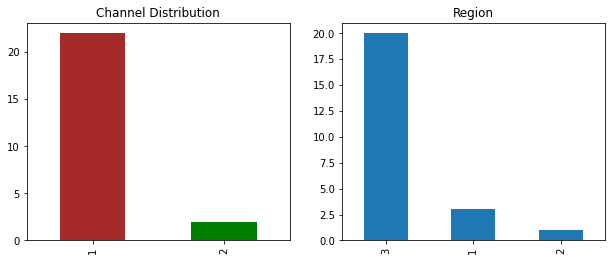

In [39]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
cluster_2['Channel'].value_counts().plot(kind='bar', color=['brown', 'green'])
plt.title('Channel Distribution')
plt.subplot(132)
cluster_2['Region'].value_counts().plot(kind='bar')
plt.title('Region')
plt.show()

##### Cluster 3

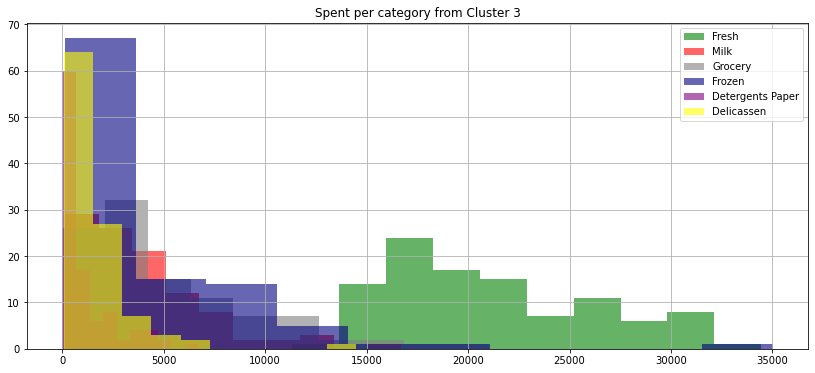

In [40]:
cluster_3['Fresh'].hist(bins=10, alpha = 0.6, color='green', figsize=(14,6), grid=True)
cluster_3['Milk'].hist(bins=10, alpha = 0.6, color='red', figsize=(14,6), grid=True)
cluster_3['Grocery'].hist(bins=10, alpha = 0.6, color='gray', figsize=(14,6), grid=True)
cluster_3['Frozen'].hist(bins=10, alpha = 0.6, color='navy', figsize=(14,6), grid=True)
cluster_3['Detergents_Paper'].hist(bins=10, alpha = 0.6, color='purple', figsize=(14,6), grid=True)
cluster_3['Delicassen'].hist(bins=10, alpha = 0.6, color='yellow', figsize=(14,6), grid=True)
plt.legend(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents Paper', 'Delicassen'])
plt.title('Spent per category from Cluster 3')
plt.show()

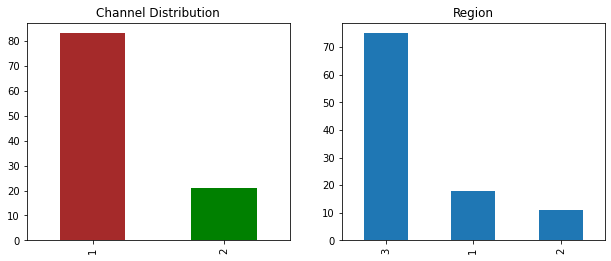

In [41]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
cluster_3['Channel'].value_counts().plot(kind='bar', color=['brown', 'green'])
plt.title('Channel Distribution')
plt.subplot(132)
cluster_3['Region'].value_counts().plot(kind='bar')
plt.title('Region')
plt.show()

##### Cluster 4

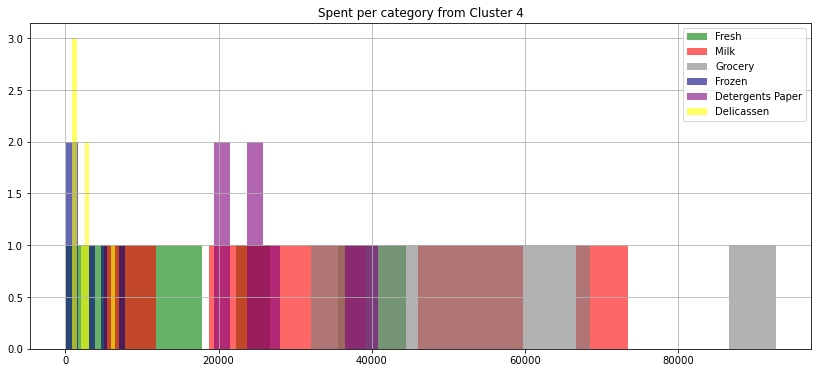

In [42]:
cluster_4['Fresh'].hist(bins=10, alpha = 0.6, color='green', figsize=(14,6), grid=True)
cluster_4['Milk'].hist(bins=10, alpha = 0.6, color='red', figsize=(14,6), grid=True)
cluster_4['Grocery'].hist(bins=10, alpha = 0.6, color='gray', figsize=(14,6), grid=True)
cluster_4['Frozen'].hist(bins=10, alpha = 0.6, color='navy', figsize=(14,6), grid=True)
cluster_4['Detergents_Paper'].hist(bins=10, alpha = 0.6, color='purple', figsize=(14,6), grid=True)
cluster_4['Delicassen'].hist(bins=10, alpha = 0.6, color='yellow', figsize=(14,6), grid=True)
plt.legend(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents Paper', 'Delicassen'])
plt.title('Spent per category from Cluster 4')
plt.show()

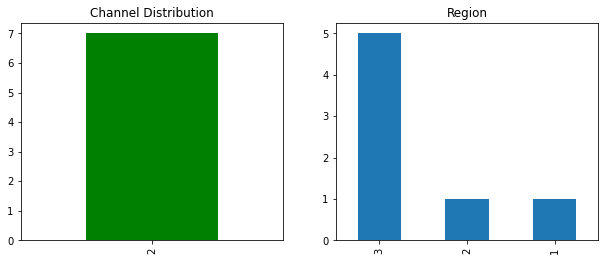

In [43]:
plt.figure(figsize=(16, 4))

plt.subplot(131)
cluster_4['Channel'].value_counts().plot(kind='bar', color=['green'])
plt.title('Channel Distribution')
plt.subplot(132)
cluster_4['Region'].value_counts().plot(kind='bar')
plt.title('Region')
plt.show()

Now that we have a first snapshot of the ammount spent by customer for each of the clusters, we can provide with a more detailed description to the wholesale company on how their customers usually spend their money according to each of the categories.

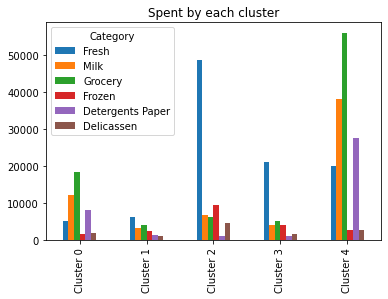

In [44]:
average_spent = {
                'Category': ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents Paper', 'Delicassen'],
                'Cluster 0': [cluster_0['Fresh'].mean(), cluster_0['Milk'].mean(), cluster_0['Grocery'].mean(), cluster_0['Frozen'].mean(), cluster_0['Detergents_Paper'].mean(), cluster_0['Delicassen'].mean()],
                'Cluster 1': [cluster_1['Fresh'].mean(), cluster_1['Milk'].mean(), cluster_1['Grocery'].mean(), cluster_1['Frozen'].mean(), cluster_1['Detergents_Paper'].mean(), cluster_1['Delicassen'].mean()],
                'Cluster 2': [cluster_2['Fresh'].mean(), cluster_2['Milk'].mean(), cluster_2['Grocery'].mean(), cluster_2['Frozen'].mean(), cluster_2['Detergents_Paper'].mean(), cluster_2['Delicassen'].mean()],
                'Cluster 3': [cluster_3['Fresh'].mean(), cluster_3['Milk'].mean(), cluster_3['Grocery'].mean(), cluster_3['Frozen'].mean(), cluster_3['Detergents_Paper'].mean(), cluster_3['Delicassen'].mean()],
                'Cluster 4': [cluster_4['Fresh'].mean(), cluster_4['Milk'].mean(), cluster_4['Grocery'].mean(), cluster_4['Frozen'].mean(), cluster_4['Detergents_Paper'].mean(), cluster_4['Delicassen'].mean()]
                }

average_spent = pd.DataFrame(average_spent)
average_spent = average_spent.set_index('Category').transpose()

average_spent.plot(kind='bar')
plt.title('Spent by each cluster')
plt.show()

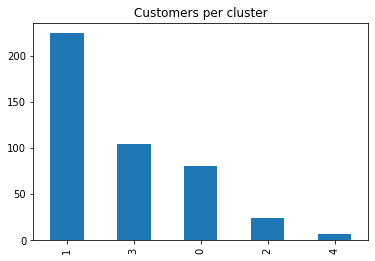

In [45]:
customers_db['Cluster_Label'].value_counts().plot(kind='bar')
plt.title('Customers per cluster')
plt.show()

### Conclusion

Now that we have performed the K-means algorithm to create 5 different clusters of the dataset and also some initial data analysis for each of the clusters to identify their most apparent behaviour and personality, we can now return to the wholesale company with this data for them to create the necessary marketing strategy depending each of the clusters.

One limitation from this particular example was the size of the original dataset, which wasn't too big (440 datapoints) and it's not very usefull when creating a Machine Learning algorithm. We would need to collect more data for that.

### Submission Form

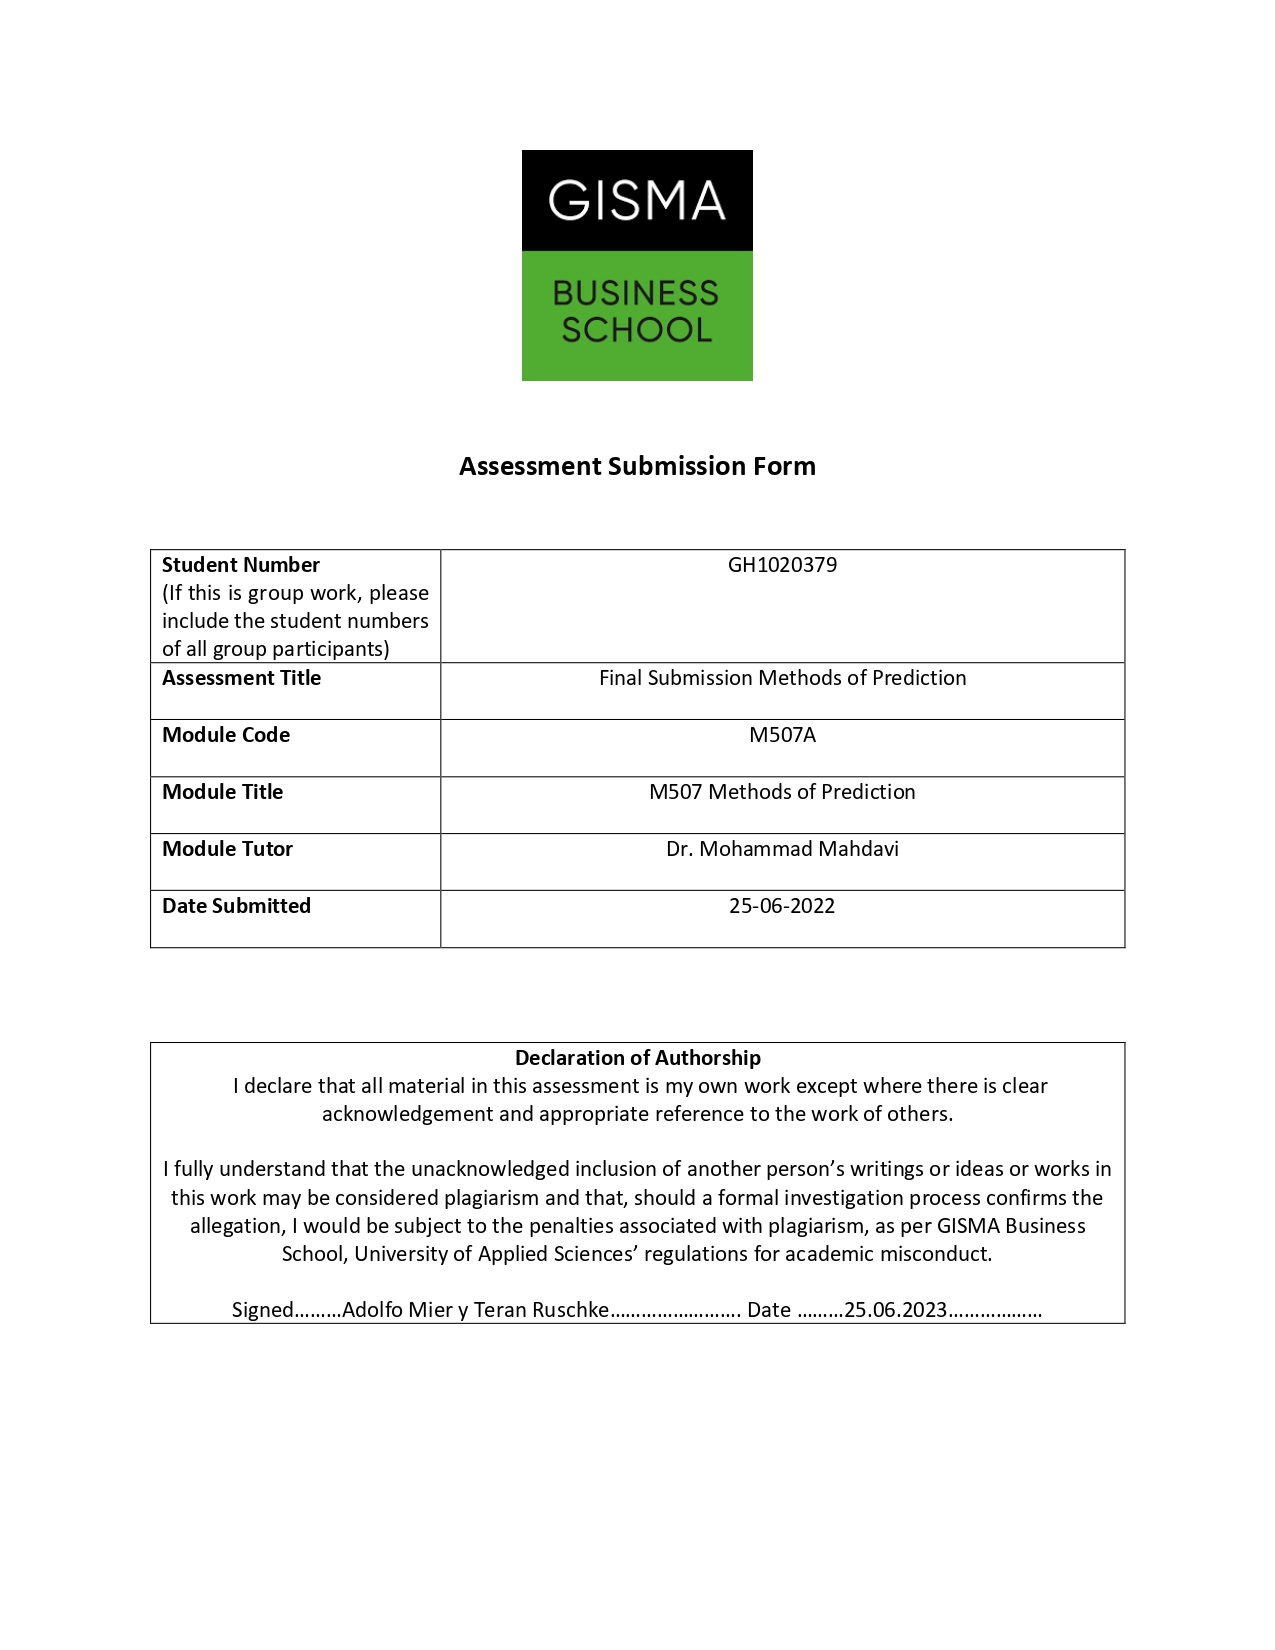

In [46]:
display.Image("/Users/adolfomytr/Documents/Alemania/Master/GISMA/Materias/methods_of_prediction/Assessment_Submission_Form_Meth_Pred_page-0001.jpg", width=500, height= 650)

In [48]:
!jupyter nbconvert --to html final_assignment_clustering.ipynb

[NbConvertApp] Converting notebook final_assignment_clustering.ipynb to html
[NbConvertApp] Writing 1302260 bytes to final_assignment_clustering.html
